In [10]:
%autosave 10
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [17]:
df = pd.read_csv('K:\Desktop\Datascience\cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [137]:
X = df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1)

In [152]:
np.mean(y_train)

0.21968027753035488

In [153]:
np.mean(y_test)

0.23026439152447029

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [154]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [156]:
y_pred = model.predict( X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [157]:
y_pred_prob = model.predict_proba( X_test)
y_pred_prob

array([[0.83977514, 0.16022486],
       [0.96246012, 0.03753988],
       [0.83977514, 0.16022486],
       ...,
       [0.7990654 , 0.2009346 ],
       [0.53445688, 0.46554312],
       [0.68119193, 0.31880807]])

In [165]:
pos_proba = y_pred_prob[:,1]
pos_proba

array([0.16022486, 0.03753988, 0.16022486, ..., 0.2009346 , 0.46554312,
       0.31880807])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [194]:
model.score(X_test, y_test)
from sklearn import metrics
fp, tp, thersholds = metrics.roc_curve(y_test, pos_proba )
print(fp, tp, thersholds)

[0.         0.0136419  0.01388551 0.06991474 0.1181486  0.12570037
 0.22630938 0.25164434 0.27405603 0.32789281 0.35030451 0.37783191
 0.39756395 0.41948843 0.44311815 0.46455542 0.50523752 0.53105968
 0.5498173  0.58416565 0.59366626 0.65359318 0.67673569 0.69354446
 0.72107186 0.74323995 0.75322777 0.77101096 0.78294762 0.80341048
 0.81412911 0.83386114 0.8455542  0.85529842 0.85529842 0.86065773
 0.86894032 0.87868453 0.91254568 0.91546894 0.92082826 0.92764921
 0.936419   0.93934227 0.94665043 0.94859927 0.95127893 0.95809988
 0.96077954 0.96321559 0.96613886 0.96857491 0.99342266 0.99390987
 0.99464068 0.99488429 0.9953715  0.99610231 0.99658952 0.99756395
 0.99756395 0.99780755 0.99926918 0.99975639 1.        ] [0.         0.03501629 0.03501629 0.13680782 0.21824104 0.23534202
 0.36482085 0.3990228  0.43078176 0.49429967 0.52117264 0.55944625
 0.58550489 0.61563518 0.63273616 0.65879479 0.68403909 0.6995114
 0.71254072 0.73045603 0.73615635 0.77605863 0.79478827 0.81596091
 0.835

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

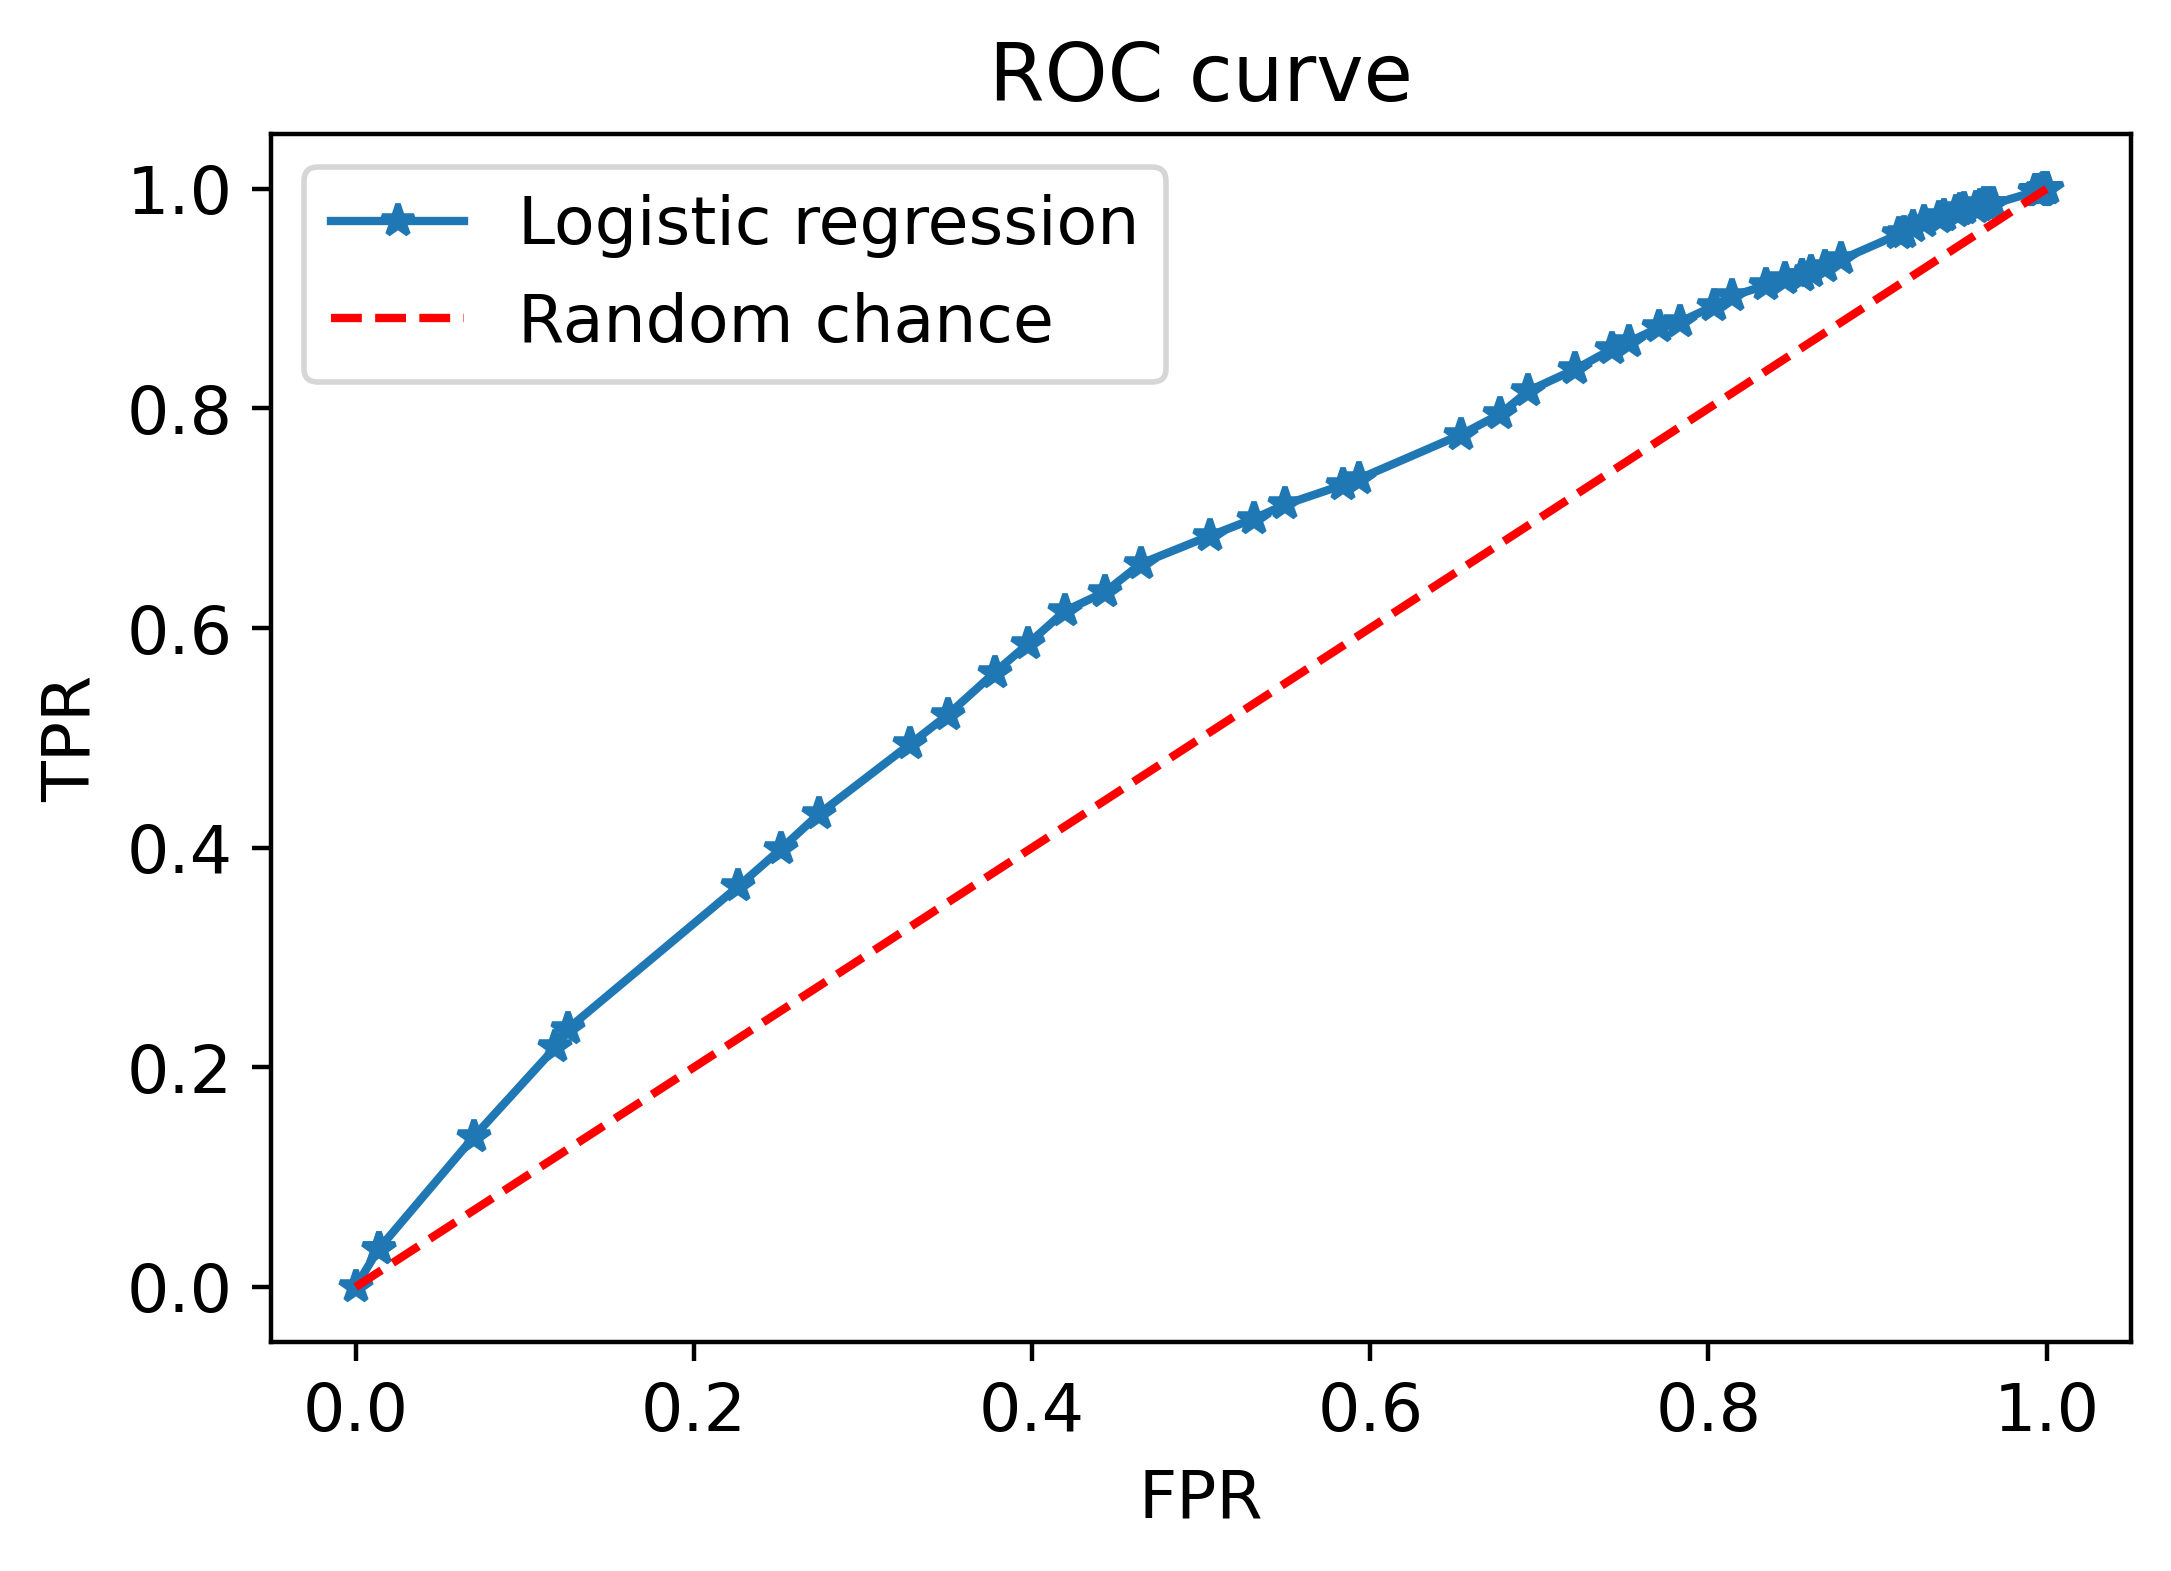

In [195]:
plt.plot(fp, tp, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [207]:
from sklearn.metrics import  precision_recall_curve
precision, recall, thershould = precision_recall_curve(y_test, pos_proba )


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0, 0.5, 'recall')

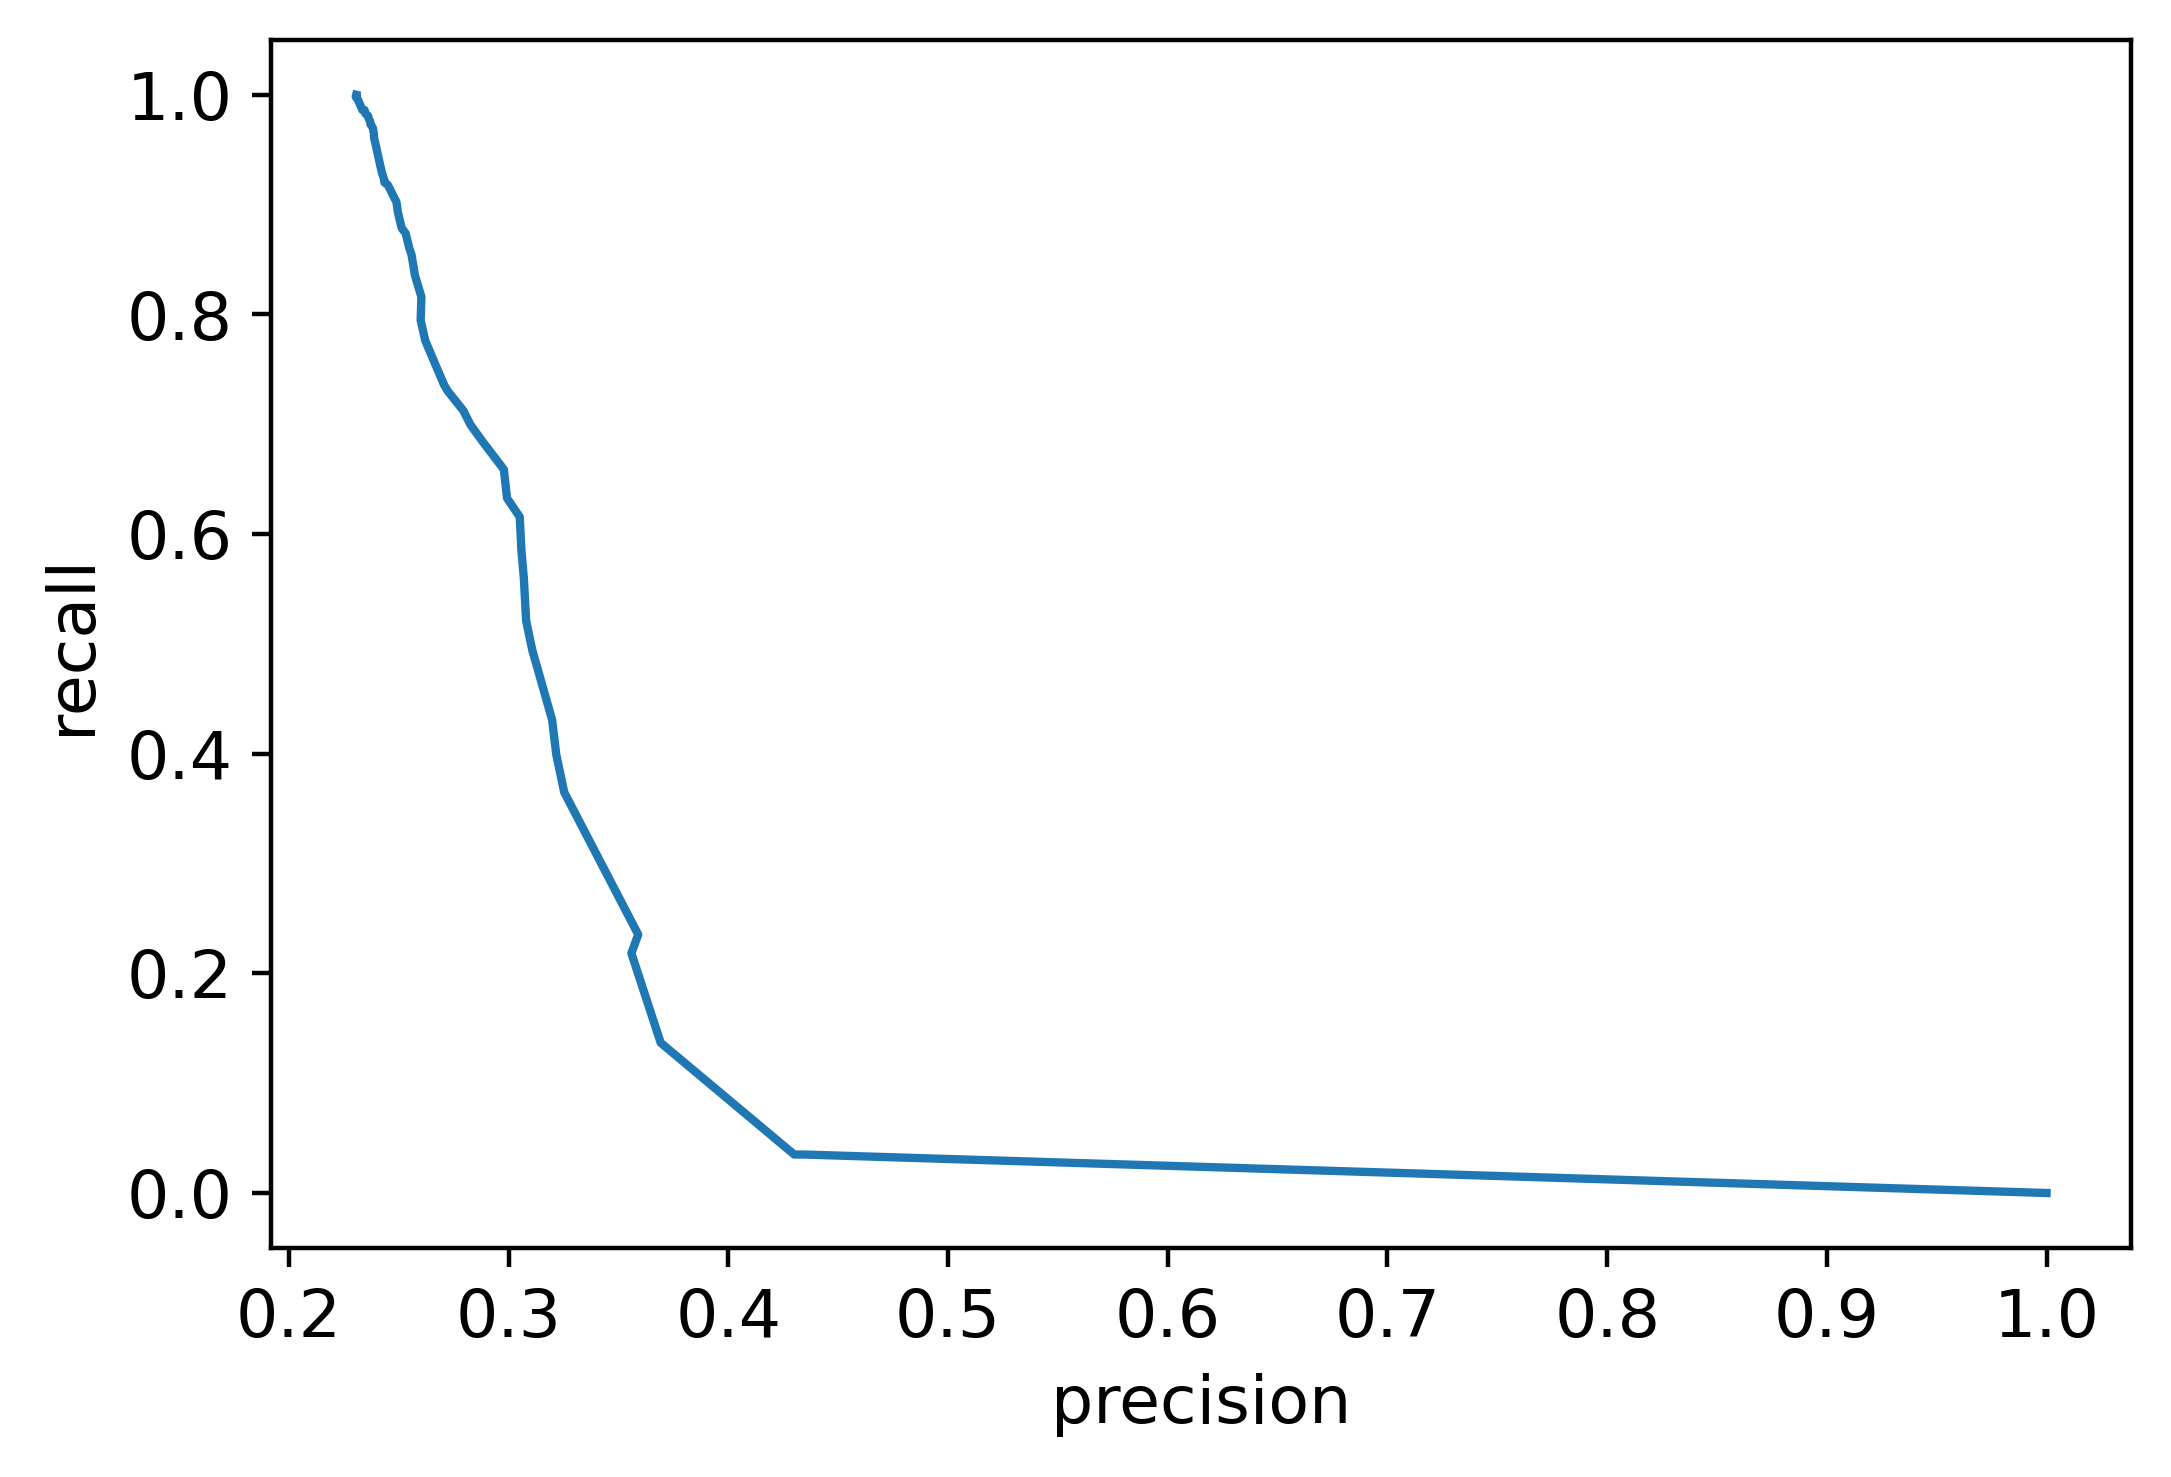

In [209]:
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [191]:
metrics.roc_auc_score(y_test, pos_proba)

0.6167380488559673

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [211]:
model.score(X_train, y_train)

0.7697356084755297

    How is this different, conceptually and quantitatively, from your earlier calculation?
